In [1]:
import pandas as pd
import datetime as dt
import xgboost as xgb

In [2]:
df = pd.read_csv('fraudTrain.csv')

In [3]:
df['age']=dt.date.today().year-pd.to_datetime(df['dob']).dt.year
df['hour']=pd.to_datetime(df['trans_date_trans_time']).dt.hour
df['day']=pd.to_datetime(df['trans_date_trans_time']).dt.dayofweek
df['month']=pd.to_datetime(df['trans_date_trans_time']).dt.month
train=df[['category','amt','zip','lat','long','city_pop','merch_lat','merch_long','age','hour','day','month','is_fraud']]
train=pd.get_dummies(train, drop_first=True)
y_train = train['is_fraud']
y_train_values=y_train.values
X_train=train.drop("is_fraud", axis='columns')
X_train_values=X_train.values

In [4]:
X_train

,amt,zip,lat,long,city_pop,merch_lat,merch_long,age,hour,day,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,4.97,28654,36.0788,-81.1781,3495,36.011293,-82.048315,35,0,1,...,False,False,False,False,True,False,False,False,False,False
1,107.23,99160,48.8878,-118.2105,149,49.159047,-118.186462,45,0,1,...,True,False,False,False,False,False,False,False,False,False
2,220.11,83252,42.1808,-112.2620,4154,43.150704,-112.154481,61,0,1,...,False,False,False,False,False,False,False,False,False,False
3,45.00,59632,46.2306,-112.1138,1939,47.034331,-112.561071,56,0,1,...,False,False,False,False,False,False,False,False,False,False
4,41.96,24433,38.4207,-79.4629,99,38.674999,-78.632459,37,0,1,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,15.56,84735,37.7175,-112.4777,258,36.841266,-111.690765,62,12,6,...,False,False,False,False,False,False,False,False,False,False
1296671,51.70,21790,39.2667,-77.5101,100,38.906881,-78.246528,44,12,6,...,False,False,False,False,False,False,False,False,False,False
1296672,105.93,88325,32.9396,-105.8189,899,33.619513,-105.130529,56,12,6,...,False,False,False,False,False,False,False,False,False,False
1296673,74.90,57756,43.3526,-102.5411,1126,42.788940,-103.241160,43,12,6,...,False,False,False,False,False,False,False,False,False,False


In [5]:
model = xgb.XGBClassifier()
model.fit(X_train_values, y_train_values)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
[16:39:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
[16:39:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


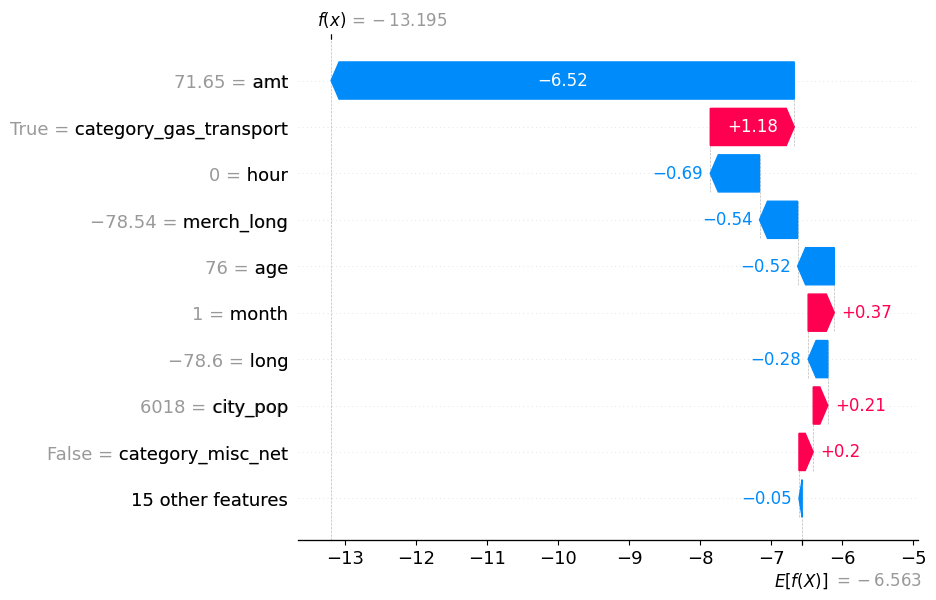

In [6]:
from shap import Explainer, Explanation, waterfall_plot

explainer = Explainer(model)
sv = explainer(X_train[:10000])
exp = Explanation(sv, sv.base_values, X_train, feature_names=X_train.columns)
idx = 7
waterfall_plot(exp[idx])

In [7]:
exp[idx]

.values =
array([-6.52066851e+00,  1.78266391e-01,  2.32810378e-02, -2.77236372e-01,
        2.05555424e-01, -1.34133771e-01, -5.36378443e-01, -5.16548812e-01,
       -6.93219006e-01, -1.79045573e-01,  3.68524194e-01, -7.19234422e-02,
        1.18247736e+00, -5.61309084e-02, -5.04168645e-02,  1.12717189e-02,
        3.23135965e-02,  1.16096651e-02,  2.00788915e-01, -1.14892654e-01,
       -3.67073854e-03,  1.58732668e-01,  1.49051562e-01,  6.46949629e-04],
      dtype=float32)

.base_values =
-6.56347

.data =
array([71.65, 22824, 38.8432, -78.6003, 6018, 38.948089, -78.540296, 76,
       0, 1, 1, False, True, False, False, False, False, False, False,
       False, False, False, False, False], dtype=object)

In [8]:
import pickle

# dump exp[idx]
with open('exp.pkl', 'wb') as f:
    pickle.dump(exp[idx], f)

In [9]:
# Load exp[idx]
with open('exp.pkl', 'rb') as f:
    exp = pickle.load(f)

exp

.values =
array([-6.52066851e+00,  1.78266391e-01,  2.32810378e-02, -2.77236372e-01,
        2.05555424e-01, -1.34133771e-01, -5.36378443e-01, -5.16548812e-01,
       -6.93219006e-01, -1.79045573e-01,  3.68524194e-01, -7.19234422e-02,
        1.18247736e+00, -5.61309084e-02, -5.04168645e-02,  1.12717189e-02,
        3.23135965e-02,  1.16096651e-02,  2.00788915e-01, -1.14892654e-01,
       -3.67073854e-03,  1.58732668e-01,  1.49051562e-01,  6.46949629e-04],
      dtype=float32)

.base_values =
-6.56347

.data =
array([71.65, 22824, 38.8432, -78.6003, 6018, 38.948089, -78.540296, 76,
       0, 1, 1, False, True, False, False, False, False, False, False,
       False, False, False, False, False], dtype=object)

In [11]:
exp.values

array([-6.52066851e+00,  1.78266391e-01,  2.32810378e-02, -2.77236372e-01,
        2.05555424e-01, -1.34133771e-01, -5.36378443e-01, -5.16548812e-01,
       -6.93219006e-01, -1.79045573e-01,  3.68524194e-01, -7.19234422e-02,
        1.18247736e+00, -5.61309084e-02, -5.04168645e-02,  1.12717189e-02,
        3.23135965e-02,  1.16096651e-02,  2.00788915e-01, -1.14892654e-01,
       -3.67073854e-03,  1.58732668e-01,  1.49051562e-01,  6.46949629e-04],
      dtype=float32)

In [12]:
X_train.columns

Index(['amt', 'zip', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long',
       'age', 'hour', 'day', 'month', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel'],
      dtype='object')